In [2]:
print ("Hello, World and hopefully future employer! This is an attempt at an EDA concerning a HR dataset from Kaggle")

Hello, World and hopefully future employer! This is an attempt at an EDA concerning a HR dataset from Kaggle


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Specify the file path
file_path = "/workspaces/codespaces-jupyter/HRDataset_v14(1)GenderEdit.csv"

# Read the dataset
df = pd.read_csv(file_path)


In [5]:
# Display the first few rows of the dataset
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource Perfor

In [6]:
#Gotta see the rest of these variables!
pd.set_option('display.max_columns', None)
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip       DOB Sex MaritalD

In [7]:
# Summary statistics of the dataset
print("Summary statistics of the DataFrame:")
print(df.describe())

Summary statistics of the DataFrame:
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.29

The statistics above imply that there is missing information in two variables : ManagerID and DateofTermination totally understandable but lets have a quick look at these variables.

In [8]:
# You can run the code to filter and display columns with less than the maximum count compared to the shape of the df
column_max_count = df.count().max()
columns_to_display = [col for col in df.columns if df[col].count() < column_max_count]

# Display only the selected columns
print(df[columns_to_display])


    DateofTermination  ManagerID
0                 NaN       22.0
1           6/16/2016        4.0
2           9/24/2012       20.0
3                 NaN       16.0
4            9/6/2016       39.0
..                ...        ...
306               NaN       20.0
307         9/29/2015       12.0
308               NaN        2.0
309               NaN        4.0
310               NaN       14.0

[311 rows x 2 columns]


Nulls for DateofTermination variable are indicative of terminated employees as there is no other variable indicating employment status within the company.
Though if we created another variable it could be useful for a dashboard i.e. employed or not with company but this won't be important for now.

In [9]:
# Create a boolean mask to identify rows with missing ManagerID
missing_manager_mask = df['ManagerID'].isna()

# Use the mask to filter and display the rows with missing ManagerID
rows_with_missing_manager = df[missing_manager_mask]

# Display the rows
print(rows_with_missing_manager)

          Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
19        Becker, Scott  10277          0                0         1   
30   Buccheri, Joseph    10184          0                0         1   
44    Chang, Donovan  E  10154          0                0         1   
88      Fancett, Nicole  10136          0                0         0   
135     Hutter, Rosalie  10214          0                3         0   
177   Manchester, Robyn  10077          1                1         0   
232     Rivera, Haley    10011          1                1         0   
251      Sewkumar, Nori  10071          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
19             3       5            3                       0   53250      0   
30             1       5            3                       0   65288      0   
44             1       5            3                       0   60380      0   
88             1       5       

The missing ManagerID is interesting as i assume it is directly related to manager name. Let's check the manager names to see if they show up in the employee list.

In [10]:
# Create a boolean mask to identify rows with the name "Webster Butler"
webster_butler_mask = df['Employee_Name'] == "Butler, Webster"

# Use the mask to filter and display the row(s) with the name "Webster Butler"
webster_butler_rows = df[webster_butler_mask]

# Display the row(s)
print(webster_butler_rows)


Empty DataFrame
Columns: [Employee_Name, EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences]
Index: []


No results lets try another.

In [11]:
#We returned an empty dataframe so we can try a different manager name
webster_butler_mask = df['Employee_Name'] == "Roup, Simon"

webster_butler_rows = df[webster_butler_mask]

print(webster_butler_rows)


Empty DataFrame
Columns: [Employee_Name, EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences]
Index: []


Oops this is indicative that we don't have the info of the managers. However this is a good thing as we have learned something about the limits of this dataset and in analysis robust information can be key! Also it means we can move on!
(Obviously if this was more professionally developed outside of personal use I would change the names of the mask to be less confusing but this is just to showcase EDA) 

There is also something else I have noticed, if we look to the genderID variables they are only 1 or 0, 1 seems to indicate male and the other female, in a real scenario we would probably have extra numbers as it is extrmely likely some people don't conform to these standards. Therefore lets do a quick switcheroo and change it to be more presentable. 

In [12]:
# Define a mapping for the replacement
gender_mapping = {0: 'female', 1: 'male'}

# Use the 'replace' method to perform the replacement
df['GenderID'] = df['GenderID'].replace(gender_mapping)

With this final line of code we can conclude this data is aboslutely clean though we are obviously missing some information. 
In the real world we would make sure that the data we have is appropriate for the task at hand, my task in this instance is to simply perform and EDA. If this information wasn't adequate we would delve into the data collection process or ask a higher up or stakeholder inr order to pull more rows of people.

In [13]:
# Save the modified DataFrame to a new CSV file
df.to_csv('HR_dataCleaned.csv', index=False)
print("CSV file successfully saved/cleaned.")

CSV file successfully saved/cleaned.


Now that we have a nice clean dataset we can begin some analysis we already took a couple steps towards this such as creating a couple important data frames so lets just show them again.

In [14]:
pd.set_option('display.max_columns', None)
print(df.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID GenderID  \
0       Adinolfi, Wilson  K  10026          0                0     male   
1  Ait Sidi, Karthikeyan     10084          1                1     male   
2         Akinkuolie, Sarah  10196          1                1   female   
3              Alagbe,Trina  10088          1                1   female   
4          Anderson, Carol   10069          0                2   female   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State   Zip       DOB Sex MaritalDesc  \

In [15]:
print("Summary statistics of the DataFrame:")
print(df.describe())

Summary statistics of the DataFrame:
              EmpID   MarriedID  MaritalStatusID  EmpStatusID      DeptID  \
count    311.000000  311.000000       311.000000   311.000000  311.000000   
mean   10156.000000    0.398714         0.810289     2.392283    4.610932   
std       89.922189    0.490423         0.943239     1.794383    1.083487   
min    10001.000000    0.000000         0.000000     1.000000    1.000000   
25%    10078.500000    0.000000         0.000000     1.000000    5.000000   
50%    10156.000000    0.000000         1.000000     1.000000    5.000000   
75%    10233.500000    1.000000         1.000000     5.000000    5.000000   
max    10311.000000    1.000000         4.000000     5.000000    6.000000   

       PerfScoreID  FromDiversityJobFairID         Salary       Termd  \
count   311.000000              311.000000     311.000000  311.000000   
mean      2.977492                0.093248   69020.684887    0.334405   
std       0.587072                0.291248   25156

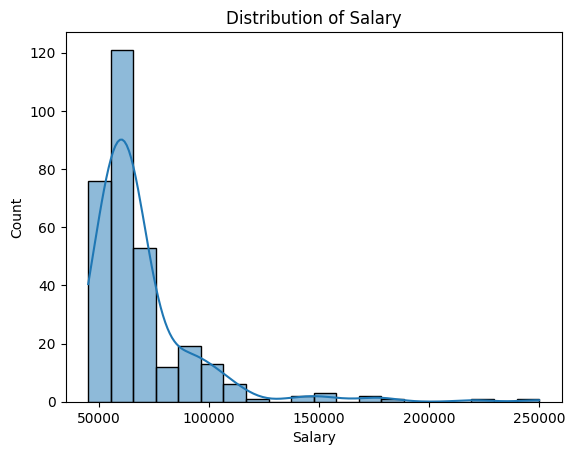

In [16]:
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title('Distribution of Salary')
plt.show()

From this we can more easily see the median range of salary for this company. Even though this is shown in the statistics via the describe function it is easier to see and interpret via a visualisation graph.

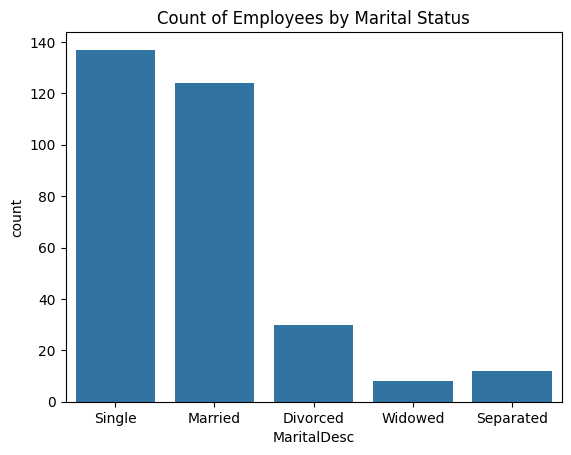

In [17]:
sns.countplot(x='MaritalDesc', data=df)
plt.title('Count of Employees by Marital Status')
plt.show()
